<a href="https://colab.research.google.com/github/RaeganGutierrez/Intro-Deep-Learning/blob/main/CNN_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## P1 (35pt):  Write a Python code using NumPy, Matplotlib, and Keras to perform image classification for the Fashion_MINIST datset (https://github.com/zalandoresearch/fashion-mnist)

1. (5pt) Load the dataset and show the first 12 images of the training dataset in two rows.

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


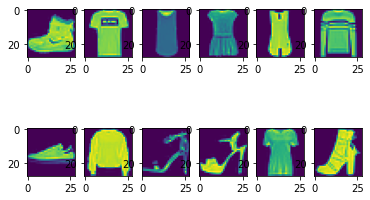

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

#first 12 images
for i in range(12):
	plt.subplot(2, 6, i + 1)
	plt.imshow(train_images[i])
plt.show()

2. (5pt) Add the “depth” dimension to the training/testing image, transform all labels into their one-hot encoding forms, and normalize the pixel values of all images into [0, 1]. Print out the shapes of training and testing images.




In [ ]:
#add depth dimension and normalize
train_images = train_images.reshape((60000, 28, 28, 1))
train = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test = test_images.astype('float32') / 255

#transform
trainy = to_categorical(train_labels)
testy = to_categorical(test_labels)

print(train.shape)
print(test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


3. (10pt) Build a CNN model using a stack of Conv2D (128 filters of size (3, 3) with ReLU activation), MaxPooling2D (pool size of (2, 2)), Conv2D (64 filters of size (3, 3 with ReLU activation), MaxPooling2D (pool size of (2, 2)), Dense (128 hidden units with ReLU activation), and output layer. Be sure to display the model architecture.

In [ ]:
#load libraries
from tensorflow.keras import models
from tensorflow.keras import layers

#add layers
model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

4. (10pt) Compile and train the model for 10 epochs and batch size of 32. Set verbose = 0 during the training to compress the training progress. Draw the plot of the training accuracy w.r.t. the epoch number.


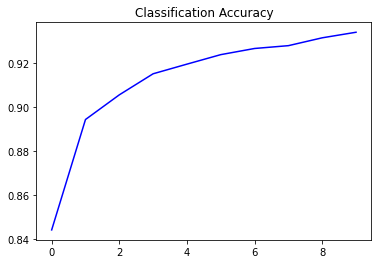

In [ ]:
#compile model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train, trainy, epochs = 10, batch_size = 32, verbose = 0)

#plot training accuracy with regards to the epoch number
acc = history.history['accuracy']
epochs = range(len(acc))

plt.title('Classification Accuracy')
plt.plot(epochs, acc, color='blue')
plt.show()

5. (5pt) Test your trained model on the testing dataset and observe the loss and accuracy.

In [ ]:
#test and evaluate model
metrics = model.evaluate(test, testy)
print(metrics)

313/313 [==============================] - 2s 5ms/step - loss: 0.3164 - accuracy: 0.9001
[0.31635722517967224, 0.9000999927520752]


## P2 (65pt): Write a Python code using NumPy, Matploblib and Keras to perform image classification using pre-trained model for the CIFAR-10 dataset (https://www.cs.toronto.edu/~kriz/cifar.html).

1. (5pt) Load the dataset and show the first 20 images of the training dataset in two rows.

* You will obtain the pair of feature matrix and label vector for the training dataset and the pair of  feature matrix and label vector for the testing dataset at the end of this step

* Note that the CIFAR-10 dataset consists of 60000 32x32 color images in 10 classes, each with a label value within [0, 9]. In the following step, we want to partition this dataset into two training/testing pairs, one containing images with labels in [0, 4] and the other containing images with labels in [5, 9].

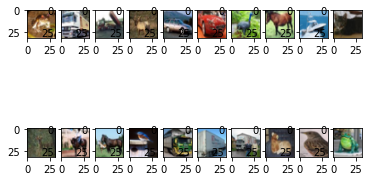

In [ ]:
from __future__ import print_function

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.datasets import mnist,cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import random

#load data and create train test split
(train_image, train_labels), (test_image, test_labels) = tf.keras.datasets.cifar10.load_data()

#print first 20 images
for i in range(20):
	plt.subplot(2, 10, i + 1)
	plt.imshow(train_image[i])
plt.show()

2.	(5 pt) Reshape the label vectors in both the training and testing datasets to 1D and compare them with 5 to find out the indices of images that have class labels < 5 and class labels >= 5, respectively, in the training and testing datasets.

* You will obtain four index arrays of Boolean values at the end of this step (<5 and >= 5 for training dataset and <5 and >=5 for testing dataset)

In [ ]:
#reshape vectors
x_train1 = (train_labels < 5).reshape(50000,)
x_train2 = (train_labels >= 5).reshape(50000,)

x_test1 = (test_labels < 5).reshape(10000,)
x_test2 = (test_labels >= 5).reshape(10000,)

3. (5 pt) Use the index arrays obtained in the previous step to split the training/testing dataset into two subsets (each consisting of a feature matrix and a label vector): one with class labels < 5 and one with class labels >= 5. Print out the shapes of the resulting subsets for both training and testing datasets.

* You will obtain four subsets at the end of this step: one pair of training and testing subsets of images with class labels < 5 and another pair of training and testing subsets of images with class labels >= 5.

In [ ]:
#split datasets by class labels
train_im1 = train_image[x_train1]
train_lab1 = train_labels[x_train1]

test_im1 = test_image[x_test1]
test_lab1 = test_labels[x_test1]

train_im2 = train_image[x_train2]
train_lab2 = train_labels[x_train2]

test_im2 = test_image[x_test2]
test_lab2 = test_labels[x_test2]

print(train_im1.shape, train_lab1.shape)
print(test_im1.shape, test_lab1.shape)
print(train_im2.shape, train_lab2.shape)
print(test_im2.shape, test_lab2.shape)

(25000, 32, 32, 3) (25000, 1)
(5000, 32, 32, 3) (5000, 1)
(25000, 32, 32, 3) (25000, 1)
(5000, 32, 32, 3) (5000, 1)


4. (5pt) Subtract 5 from the label vectors of the pair of training and testing subsets with class labels >= 5 so that the label vectors in this pair of subsets contains values from 0 to 4. Transform all labels into their one-hot encoding forms, and normalize the pixel values of all images into [0, 1].

In [ ]:
#subtract 5
train_lab2 = (train_lab2 - 5)
test_lab2 = (test_lab2 - 5)

#transform and normalize
train_lab1 = to_categorical(train_lab1)
test_lab1 = to_categorical(test_lab1)

train_lab2 = to_categorical(train_lab2)
test_lab2 = to_categorical(test_lab2)

train_im1 = train_im1.astype('float32') / 255
test_im1 = test_im1.astype('float32') / 255

train_im2 = train_im2.astype('float32') / 255
test_im2 = test_im2.astype('float32') / 255

print(train_im1.shape, train_lab1.shape)
print(train_im2.shape, train_lab2.shape)

(25000, 32, 32, 3) (25000, 5)
(25000, 32, 32, 3) (25000, 5)


5. (5pt) Build a CNN model_1 using a stack of Conv2D (64 filters of size (3, 3) with ReLU activation), Conv2D (64 filters of size (3, 3) with ReLU activation), MaxPooling2D (pool size of (2, 2)), Dense (128 hidden units with ReLU activation), and output layer. Display the model architecture.

In [ ]:
#CNN model with layers

model_1 = models.Sequential()
model_1.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Flatten())
model_1.add(layers.Dense(128, activation='relu'))
model_1.add(layers.Dense(5, activation='softmax'))

print(model_1.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 12544)             0         
                                                                 
 dense_10 (Dense)            (None, 128)               1605760   
                                                                 
 dense_11 (Dense)            (None, 5)                 645       
                                                      

6. (10pt) Compile and train the model on the subset of training images with class labels < 5 for 20 epochs and batch size of 128. Compress the results for training and draw the plot of the training accuracy w.r.t. the epoch number.

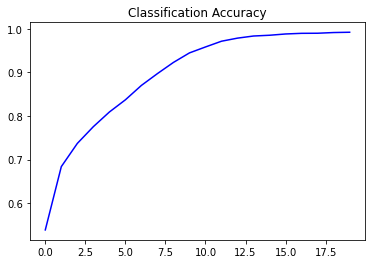

In [ ]:
#train model
model_1.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
history = model_1.fit(train_im1, train_lab1, batch_size = 128, epochs = 20, verbose = 0)

#plot training accuracy
acc = history.history['accuracy']
epochs = range(len(acc))

plt.title('Classification Accuracy')
plt.plot(epochs, acc, color='blue')

7.	(5pt) Test your trained model_1 on the subset of testing images with class labels <5  and observe the loss and accuracy.

In [ ]:
#test and evaluate model
metrics = model_1.evaluate(test_im1, test_lab1)
print(metrics)

157/157 [==============================] - 1s 4ms/step - loss: 1.6699 - accuracy: 0.7686
[1.6698627471923828, 0.7685999870300293]


8. (10pt) Build a new CNN model_2 that has the same architecture as model_1
and reuse the pre-trained convolutional base layers of model_1. You need to freeze the pre-trained convolutional base layers of model_2 so that their model parameters will not be changed during the training. Display the model architecture of model_2.

In [ ]:
#build Model 2
model_2 = keras.models.clone_model(model_1)

for layer in model_2.layers[:-2]:
    layer.trainable = False

print(model_2.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 12544)             0         
                                                                 
 dense_10 (Dense)            (None, 128)               1605760   
                                                                 
 dense_11 (Dense)            (None, 5)                 645       
                                                      

9. (10pt) Compile model_2, and train it on the subset of training images with class labels >=5 for 20 epochs and batch size of 128. Draw the plot of the training accuracy w.r.t. the epoch number.

Epoch 1/20
196/196 [==============================] - 2s 7ms/step - loss: 1.2819 - accuracy: 0.4876
Epoch 2/20
196/196 [==============================] - 1s 7ms/step - loss: 0.9994 - accuracy: 0.6119
Epoch 3/20
196/196 [==============================] - 1s 7ms/step - loss: 0.9151 - accuracy: 0.6443
Epoch 4/20
196/196 [==============================] - 1s 7ms/step - loss: 0.8560 - accuracy: 0.6738
Epoch 5/20
196/196 [==============================] - 1s 7ms/step - loss: 0.8094 - accuracy: 0.6918
Epoch 6/20
196/196 [==============================] - 1s 7ms/step - loss: 0.7725 - accuracy: 0.7097
Epoch 7/20
196/196 [==============================] - 1s 7ms/step - loss: 0.7419 - accuracy: 0.7234
Epoch 8/20
196/196 [==============================] - 1s 7ms/step - loss: 0.7148 - accuracy: 0.7339
Epoch 9/20
196/196 [==============================] - 1s 7ms/step - loss: 0.6908 - accuracy: 0.7401
Epoch 10/20
196/196 [==============================] - 1s 7ms/step - loss: 0.6674 - accuracy: 0.7500

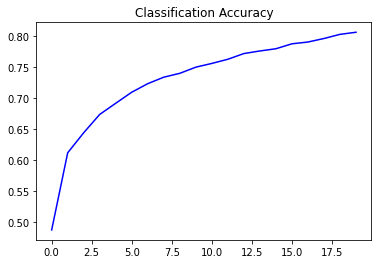

In [ ]:
#compile and fit model
model_2.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model_2.fit(train_im2, train_lab2, batch_size = 128, epochs = 20)

#plot training accuracy
acc = history.history['accuracy']
epochs = range(len(acc))

plt.title('Classification Accuracy')
plt.plot(epochs, acc, color='blue')

10.	(5pt) Test your trained model_2 on the subset of testing images with class labels >=5  and observe the loss and accuracy.

In [ ]:
#evaluate model
metrics = model_2.evaluate(test_im2, test_lab2)
print(metrics)

157/157 [==============================] - 1s 4ms/step - loss: 0.7255 - accuracy: 0.7276
[0.7255271077156067, 0.7275999784469604]
